In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/_All_Cities_Cleaned.csv")
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [ ]:
df.describe()

,bedroom,price,area,bathroom
count,193011.000000,1.930110e+05,193011.000000,193011.000000
mean,2.081679,4.433654e+04,1264.604468,2.059883
std,0.956901,9.195199e+04,1043.725561,0.934805
min,1.000000,1.200000e+03,3.000000,1.000000
25%,1.000000,1.300000e+04,650.000000,1.000000
50%,2.000000,2.100000e+04,1000.000000,2.000000
75%,3.000000,3.600000e+04,1440.000000,3.000000
max,15.000000,5.885000e+06,19800.000000,19.000000


Text(0, 0.5, 'price')

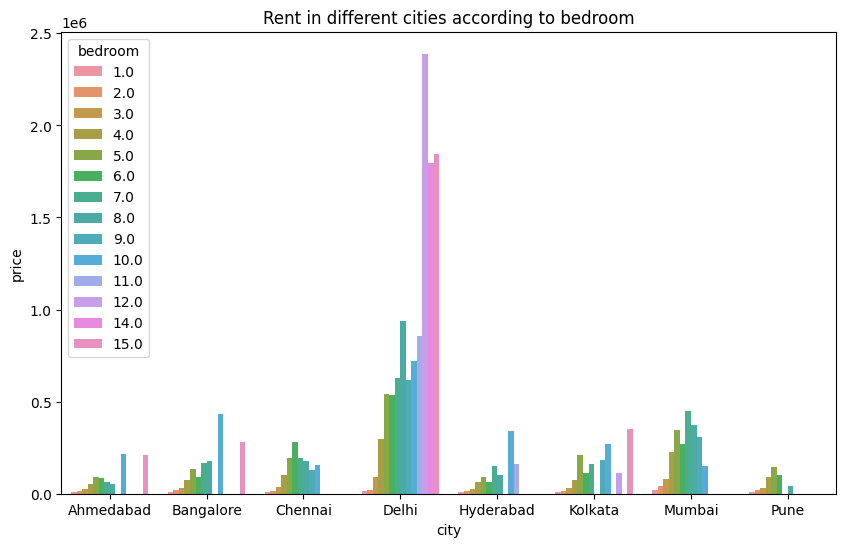

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Rent in different cities according to bedroom")
sns.barplot(x=df['city'], y=df['price'], hue=df['bedroom'],errorbar=None )
plt.ylabel("price")

Text(0, 0.5, 'Rent')

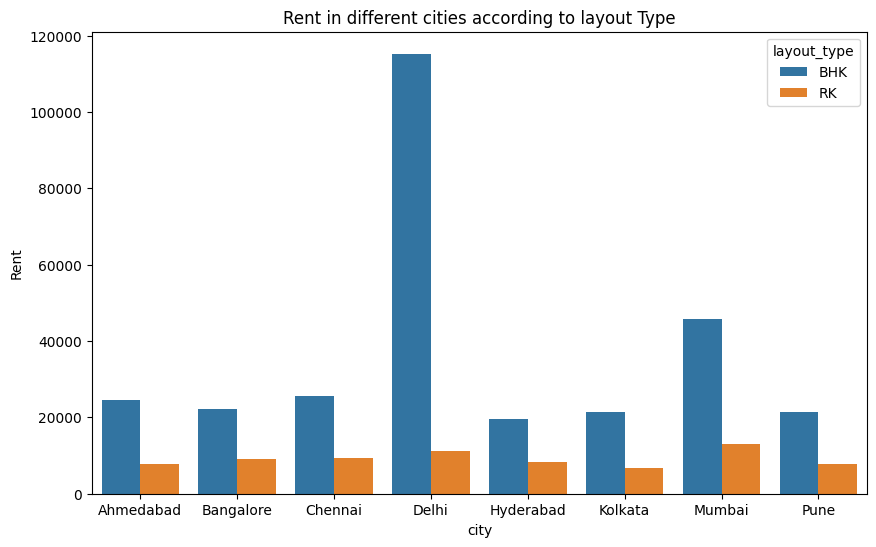

In [ ]:
plt.figure(figsize=(10,6))

plt.title("Rent in different cities according to layout Type")

sns.barplot(x=df['city'], y=df['price'], hue=df['layout_type'], errorbar=None)

# Add label for vertical axis
plt.ylabel("Rent")

Text(0, 0.5, 'Rent')

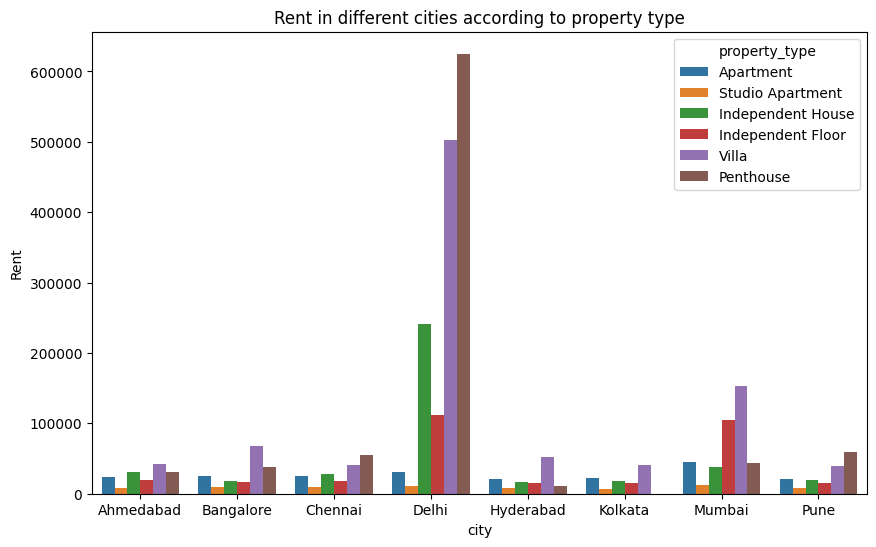

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Rent in different cities according to property type")

sns.barplot(x=df['city'], y=df['price'], hue=df['property_type'], errorbar=None)

plt.ylabel("Rent")

Text(0, 0.5, 'Rent')

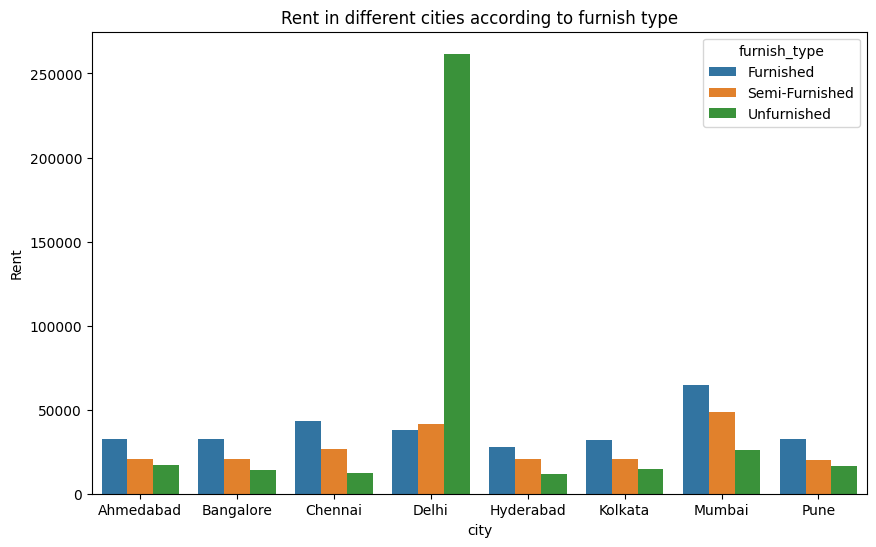

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Rent in different cities according to furnish type")

sns.barplot(x=df['city'], y=df['price'], hue=df['furnish_type'], errorbar=None)

plt.ylabel("Rent")

Text(0, 0.5, 'Rent')

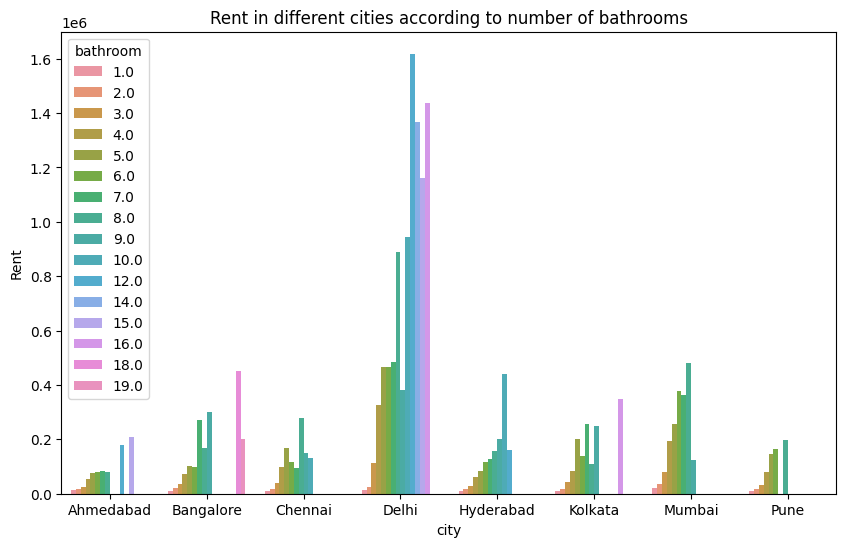

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Rent in different cities according to number of bathrooms")

sns.barplot(x=df['city'], y=df['price'], hue=df['bathroom'], errorbar=None)

plt.ylabel("Rent")

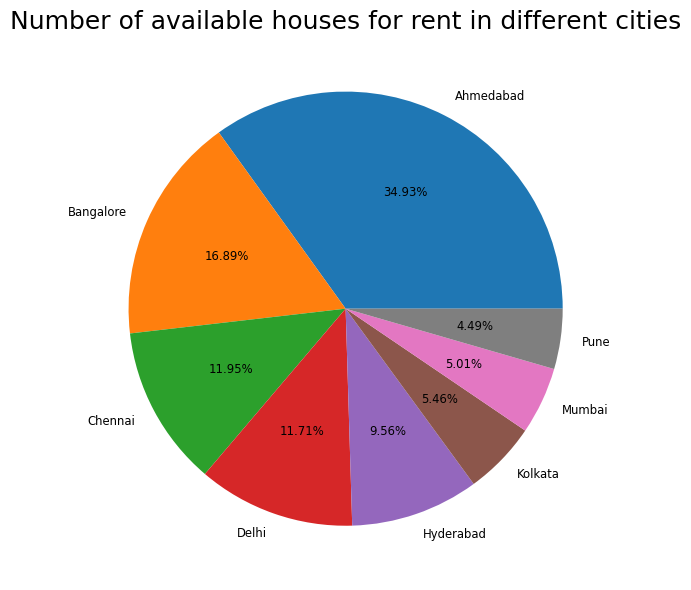

In [ ]:
cities=df['city'].unique()

x=df['city'].value_counts().values

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x, labels = cities, autopct= lambda p:f'{p:.2f}%',
       textprops={'size': 'small'})

ax.set_title('Number of available houses for rent in different cities', fontsize=18)

plt.tight_layout()

In [ ]:
#Remove useless columns
df = df.drop(columns = ['seller_type','locality'])
df.head()

,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,city
0,2.0,BHK,Apartment,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,1.0,RK,Studio Apartment,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,3.0,BHK,Apartment,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,2.0,BHK,Independent House,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,2.0,BHK,Independent House,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [ ]:
#Encoding Categorical Data
rent_data = df.join(pd.get_dummies(df[['property_type','city','furnish_type',
                                 'layout_type']],
                             drop_first=True))
rent_data.drop(columns = ['property_type','city','furnish_type',
                                 'layout_type'],
         inplace = True)
rent_data.dtypes
rent_data.head()

,bedroom,price,area,bathroom,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune,furnish_type_Semi-Furnished,furnish_type_Unfurnished,layout_type_RK
0,2.0,20000.0,1450.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,7350.0,210.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,3.0,22000.0,1900.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2.0,13000.0,1285.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.0,18000.0,1600.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
rent_data.dropna()

,bedroom,price,area,bathroom,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune,furnish_type_Semi-Furnished,furnish_type_Unfurnished,layout_type_RK
0,2.0,20000.0,1450.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,7350.0,210.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,3.0,22000.0,1900.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2.0,13000.0,1285.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.0,18000.0,1600.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193006,1.0,13250.0,650.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
193007,1.0,7000.0,350.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
193008,1.0,8500.0,389.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
193009,1.0,16500.0,670.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:

print(len(rent_data))
rent_data[:12000]

193011


,bedroom,price,area,bathroom,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune,furnish_type_Semi-Furnished,furnish_type_Unfurnished,layout_type_RK
0,2.0,20000.0,1450.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,7350.0,210.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,3.0,22000.0,1900.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2.0,13000.0,1285.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.0,18000.0,1600.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,3.0,14500.0,1791.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11996,3.0,14700.0,2250.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11997,3.0,14700.0,2250.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11998,3.0,14700.0,2250.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(rent_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area','bedroom','bathroom','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
df_train.head()

,bedroom,price,area,bathroom,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune,furnish_type_Semi-Furnished,furnish_type_Unfurnished,layout_type_RK
188967,0.142857,0.003025,0.093969,0.111111,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
26461,0.071429,0.002515,0.064570,0.055556,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
164132,0.000000,0.002345,0.013324,0.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
66542,0.214286,0.055032,0.280936,0.166667,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
177111,0.000000,0.001836,0.030640,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_train.describe()

,bedroom,price,area,bathroom,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune,furnish_type_Semi-Furnished,furnish_type_Unfurnished,layout_type_RK
count,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000,135107.000000
mean,0.077170,0.007338,0.068011,0.058857,0.141192,0.065918,0.000755,0.048066,0.016084,0.119727,0.043832,0.169295,0.054387,0.049783,0.350226,0.117196,0.495511,0.304529,0.048066
std,0.068279,0.015668,0.056284,0.051900,0.348221,0.248140,0.027466,0.213906,0.125797,0.324644,0.204722,0.375014,0.226780,0.217497,0.477042,0.321655,0.499982,0.460209,0.213906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.002006,0.034901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.071429,0.003365,0.053781,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.142857,0.005915,0.077247,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Training models

In [ ]:
y_train = df_train.pop('price')
y_test = df_test.pop('price')
X_train = df_train
X_test = df_test

In [ ]:
print(y_train)

188967    0.003025
26461     0.002515
164132    0.002345
66542     0.055032
177111    0.001836
            ...   
82270     0.001496
65615     0.001496
77655     0.054353
56088     0.059281
38408     0.001751
Name: price, Length: 135107, dtype: float64


Mean Squared Error: 0.001354699551663144


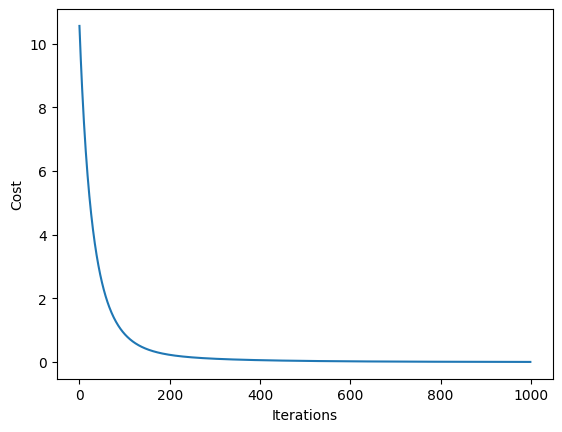

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


'''# Add a column of ones to the feature matrix
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))'''

# Initialize the parameters
theta = np.random.randn(X_train.shape[1])

# Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (X.T.dot(X.dot(theta) - y))
        J_history.append(cost_function(X, y, theta))
    return theta, J_history

# Train the model
alpha = 0.01
num_iters = 1000
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)

# Make predictions on the testing dataset
y_pred = X_test.dot(theta)
# Evaluate the performance of the model using mean squared error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

# Plot the cost function over iterations
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = regressor.predict(X_test)
print(y_pred)
mean_error_reg = mse(y_test,y_pred)
# Calculate the R-squared score
r2_reg = r2_score(y_test, y_pred)
print("R-squared Score:", r2_reg)
print("mean squared error using regresion:",mean_error_reg)


[0.00788883 0.0116128  0.00874795 ... 0.01293172 0.00965103 0.0083587 ]
R-squared Score: 0.06537939447878216
mean squared error using regresion: 0.0004583576316244862


In [ ]:
#SVM INBUIKT FUNCTION
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

# Create an SVM instance and fit the training data
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)
print(y_pred)
mean_error_svm = mse(y_test,y_pred)
print("mean squared error using regresion:",mean_error_svm)
r2_svm = r2_score(y_test, y_pred)
print("R-squared Score:", r2_svm)


[0.01961333 0.0436719  0.03337166 ... 0.07189508 0.02612447 0.03107977]
mean squared error using regresion: 0.0016222007354081938
R-squared Score: -2.3077713318108


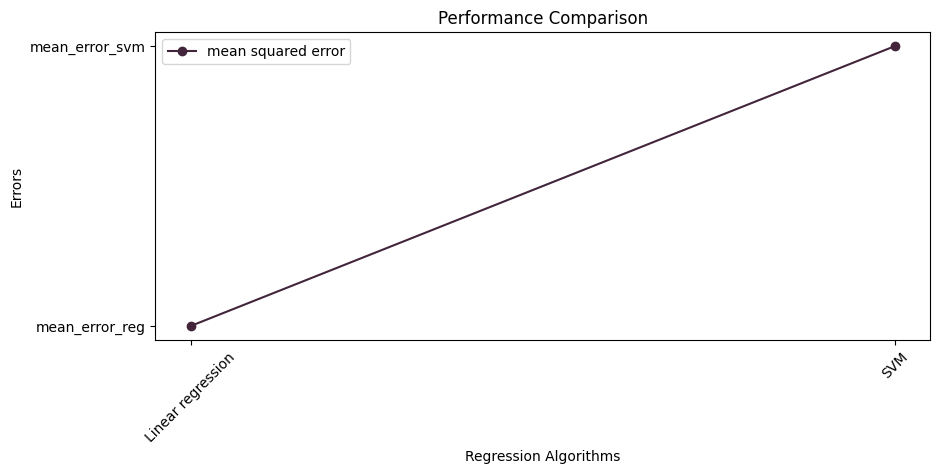

In [ ]:
algorithm_names = ['Linear regression','SVM']
errors = ['mean_error_reg', 'mean_error_svm' ]
# Plotting the scores
plt.figure( figsize = ( 10 , 4 ) )
# Accuracy scores plot
plt.plot(algorithm_names, errors, label = 'mean squared error', marker = 'o', color = '#42253B')
plt.xlabel( 'Regression Algorithms' )
plt.ylabel( 'Errors' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show ()
